In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
df = pd.read_csv('project_dataset/train_normalized.csv', skipinitialspace=True)
df_test = pd.read_csv('project_dataset/test_normalized.csv', skipinitialspace=True)

# Getting X and y

In [5]:
diz = {
    "afrobeat": 0,
    "black-metal": 1,
    "bluegrass": 2,
    "brazil": 3,
    "breakbeat": 4,
    "chicago-house": 5,
    "disney": 6,
    "forro": 7,
    "happy": 8,
    "idm": 9,
    "indian": 10,
    "industrial": 11,
    "iranian": 12,
    "j-dance": 13,
    "j-idol": 14,
    "mandopop": 15,
    "sleep": 16,
    "spanish": 17,
    "study": 18,
    "techno": 19,
}

df["genre"] = df["genre"].map(diz)
df_test["genre"] = df_test["genre"].map(diz)

In [6]:
y = list(df["genre"])
y_test = list(df_test["genre"])

In [7]:
input_columns = list(df.columns)
input_columns.remove("name")
#input_columns.remove("explicit")
input_columns.remove("artists")
input_columns.remove("album_name")
#input_columns.remove("key")
#input_columns.remove("mode")
#input_columns.remove("time_signature")
input_columns.remove("genre")

X = df[input_columns]
X_test = df_test[input_columns]

In [8]:
X.head()

,explicit,key,mode,time_signature,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,False,5,1.0,4.0,0.053798,0.522727,0.687095,0.512990,0.684705,0.082251,0.303213,0.53600,0.274226,0.638191,0.588314
1,False,1,0.0,4.0,0.103137,0.000000,0.017048,0.195984,0.438016,0.063532,0.284137,0.93400,0.354642,0.033769,0.238030
2,False,2,1.0,4.0,0.076181,0.034091,0.334268,0.853997,0.786902,0.018608,0.000090,0.80000,0.254886,0.491457,0.453757
3,False,5,1.0,4.0,0.060639,0.261364,0.506905,0.584992,0.823849,0.059128,0.066667,0.00127,0.107288,0.386935,0.581263
4,False,7,1.0,4.0,0.069873,0.284091,0.636383,0.686994,0.708606,0.034244,0.000578,0.09690,0.292549,0.640201,0.597435


# 10 cross fold validation

### With default parameters

In [9]:
dt = DecisionTreeClassifier()

In [10]:
y_pred = cross_val_predict(dt, X, y, cv=10)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.23      0.24       732
           1       0.66      0.67      0.66       742
           2       0.47      0.45      0.46       745
           3       0.33      0.31      0.32       731
           4       0.31      0.30      0.30       742
           5       0.50      0.50      0.50       747
           6       0.47      0.49      0.48       740
           7       0.53      0.53      0.53       744
           8       0.42      0.41      0.42       728
           9       0.31      0.33      0.32       740
          10       0.29      0.28      0.28       746
          11       0.31      0.31      0.31       739
          12       0.57      0.57      0.57       719
          13       0.42      0.43      0.42       735
          14       0.49      0.49      0.49       746
          15       0.37      0.38      0.37       745
          16       0.71      0.72      0.72       562
          17       0.23    

### Looking for the best parameters

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [12]:
#ci mette una quindicina di minuti a computare, se vuoi sapere solo i risultati sono scritti nella cella sotto
param_list = {
    'max_depth': [None] + list(np.arange(2, 60)),
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100, 130, 150],
    'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100, 120, 140],
    'criterion': ['gini', 'entropy']
}

clf = DecisionTreeClassifier()

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=8),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    verbose=3
)

random_search.fit(X, y)
clf = random_search.best_estimator_

Fitting 50 folds for each of 200 candidates, totalling 10000 fits


In [13]:
print(random_search.best_params_, random_search.best_score_)

{'min_samples_split': 30, 'min_samples_leaf': 10, 'max_depth': 21, 'criterion': 'gini'} 0.4691507019196568


### Found them!
'min_samples_split': 20 <br>
'min_samples_leaf': 10 <br>
'max_depth': 11 <br>
'criterion': 'gini' <br> 

with accuracy: 0.4707109326465758

## Graphs on parameter selection

In [14]:
results = pd.DataFrame(random_search.cv_results_)

<Axes: xlabel='param_max_depth', ylabel='mean_test_score'>

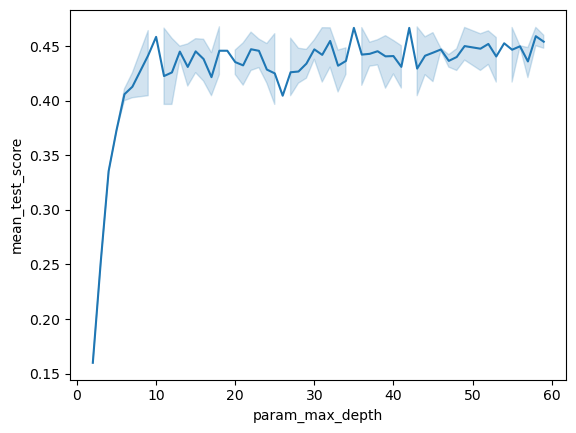

In [15]:
sns.lineplot(data=results, x="param_max_depth", y="mean_test_score")

<Axes: xlabel='param_min_samples_leaf', ylabel='mean_test_score'>

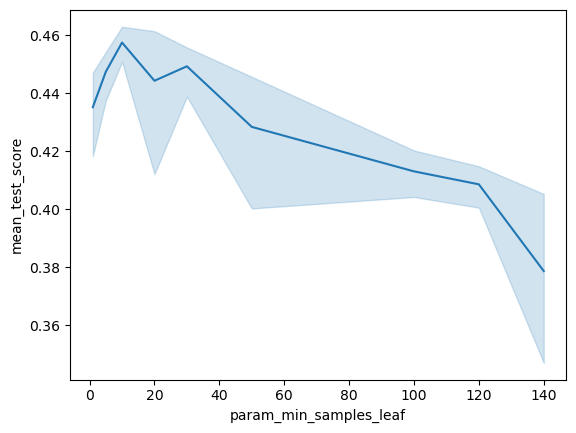

In [16]:
sns.lineplot(data=results, x="param_min_samples_leaf", y="mean_test_score")

<Axes: xlabel='param_min_samples_split', ylabel='mean_test_score'>

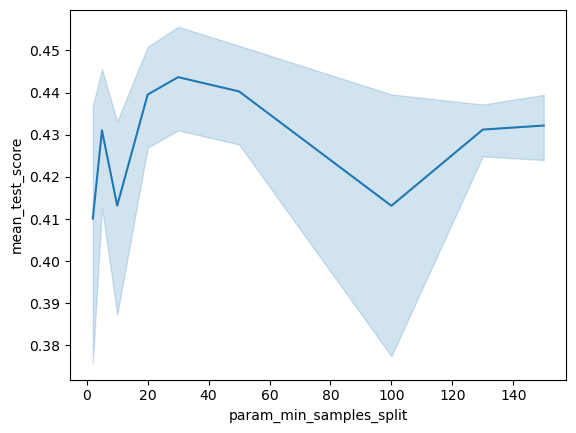

In [22]:
sns.lineplot(data=results, x="param_min_samples_split", y="mean_test_score")

## Results and evaluations with top parameters

In [17]:
                                                #best performing parameters
clf = DecisionTreeClassifier(criterion='gini', max_depth=11, min_samples_split=20, min_samples_leaf=10) 

In [18]:
y_pred = cross_val_predict(clf, X, y, cv=10)
y_pred_prob = cross_val_predict(clf, X, y, cv=10, method='predict_proba')

In [19]:
print(classification_report(y, y_pred)) #abbastanza meglio che col classificatore coi parametri di default

              precision    recall  f1-score   support

           0       0.29      0.28      0.29       732
           1       0.67      0.70      0.68       742
           2       0.49      0.53      0.51       745
           3       0.35      0.36      0.36       731
           4       0.32      0.31      0.31       742
           5       0.54      0.55      0.55       747
           6       0.50      0.46      0.48       740
           7       0.54      0.59      0.56       744
           8       0.48      0.49      0.48       728
           9       0.37      0.36      0.37       740
          10       0.32      0.29      0.30       746
          11       0.35      0.35      0.35       739
          12       0.61      0.63      0.62       719
          13       0.50      0.48      0.49       735
          14       0.56      0.50      0.53       746
          15       0.39      0.49      0.44       745
          16       0.76      0.67      0.71       562
          17       0.28    

### ROC and P-C curves

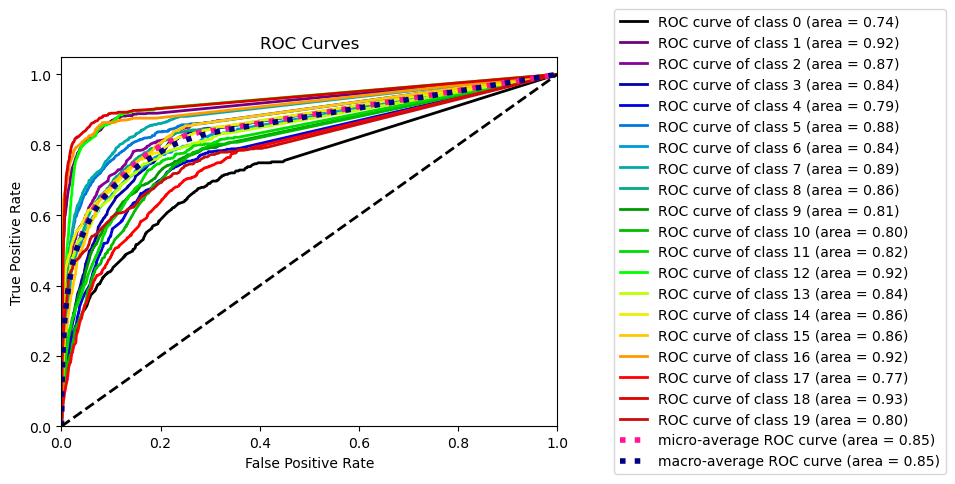

In [20]:
plot_roc(y, y_pred_prob)
plt.legend(loc='center left',prop={'size': 10}, bbox_to_anchor=(1.1, 0.5))
plt.show()

In [21]:
roc_auc_score(y, y_pred_proba, multi_class="ovr", average="macro")

NameError: name 'y_pred_proba' is not defined

In [ ]:
plot_precision_recall(y, y_pred_proba)
plt.legend(loc='center left',prop={'size': 10}, bbox_to_anchor=(1.1, 0.5))
#plt.legend(loc=2, prop={'size': 6})

plt.show()

### Confusion matrix

In [ ]:
cf = confusion_matrix(y, y_pred)
plt.figure(figsize=(20,20)) 
sns.heatmap(cf, annot=True, cmap="Reds", fmt='g')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

### Test set evaluation

In [ ]:
clf.fit(X, y)
y_test_pred = list(clf.predict(X_test))
print(classification_report(y_test, y_test_pred))

## Features importances

In [ ]:
clf.fit(X, y)

In [ ]:
zipped = zip(input_columns, clf.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

## Tree's Head

In [ ]:
plt.figure(figsize=(20, 10), dpi=300)
plot_tree(clf, feature_names=input_columns, filled=True, max_depth=3, fontsize=10)
plt.show()